In [ ]:
pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
pip install gym-anytrading

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import gym_anytrading

In [ ]:
pip install stable-baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('/content/GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
1,2023-01-10,86.720001,89.474998,86.699997,89.239998,89.239998,22855600
2,2023-01-11,90.059998,92.449997,89.739998,92.260002,92.260002,25998800
3,2023-01-12,92.400002,92.620003,90.570000,91.910004,91.910004,22754200
4,2023-01-13,91.528000,92.980003,90.930000,92.800003,92.800003,18630700


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
1,2023-01-10,86.720001,89.474998,86.699997,89.239998,89.239998,22855600
2,2023-01-11,90.059998,92.449997,89.739998,92.260002,92.260002,25998800
3,2023-01-12,92.400002,92.620003,90.570000,91.910004,91.910004,22754200
4,2023-01-13,91.528000,92.980003,90.930000,92.800003,92.800003,18630700


In [ ]:
df.set_index('Date', inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
2023-01-10,86.720001,89.474998,86.699997,89.239998,89.239998,22855600
2023-01-11,90.059998,92.449997,89.739998,92.260002,92.260002,25998800
2023-01-12,92.400002,92.620003,90.570000,91.910004,91.910004,22754200
2023-01-13,91.528000,92.980003,90.930000,92.800003,92.800003,18630700


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [ ]:
env.prices

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.prices to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.prices` for environment variables or `env.get_wrapper_attr('prices')` that will search the reminding wrappers.
  logger.warn(


array([ 88.8  ,  89.24 ,  92.26 ,  91.91 ,  92.8  ,  92.16 ,  91.78 ,
        93.91 ,  99.28 , 101.21 ,  99.21 ,  96.73 ,  99.16 , 100.71 ,
        97.95 ,  99.87 , 101.43 , 108.8  , 105.22 , 103.47 , 108.04 ,
       100.   ,  95.46 ,  94.86 ,  95.   ,  94.95 ,  97.1  ,  95.78 ,
        94.59 ,  92.05 ,  91.8  ,  91.07 ,  89.35 ,  90.1  ,  90.3  ,
        90.51 ,  92.31 ,  94.02 ,  95.58 ,  94.17 ,  94.65 ,  92.66 ,
        91.01 ,  91.66 ,  94.25 ,  96.55 , 101.07 , 102.46 , 101.93 ,
       105.84 , 104.22 , 106.26 , 106.06 , 103.06 , 101.36 , 101.9  ,
       101.32 , 104.   , 104.91 , 105.12 , 104.95 , 108.9  , 106.95 ,
       106.12 , 105.22 , 108.19 , 109.46 , 106.42 , 105.12 , 105.02 ,
       105.9  , 105.91 , 106.78 , 104.61 , 104.45 , 108.37 , 108.22 ,
       107.71 , 105.98 , 106.12 , 105.21 , 106.215, 108.24 , 107.94 ,
       112.28 , 116.9  , 117.92 , 116.96 , 120.09 , 121.48 , 123.52 ,
       123.25 , 125.87 , 123.29 , 121.64 , 124.35 , 125.43 , 124.64 ,
       123.37 , 124.

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 39.24998474121094, 'total_profit': 0.5622356820891286, 'position': <Positions.Short: 0>}


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


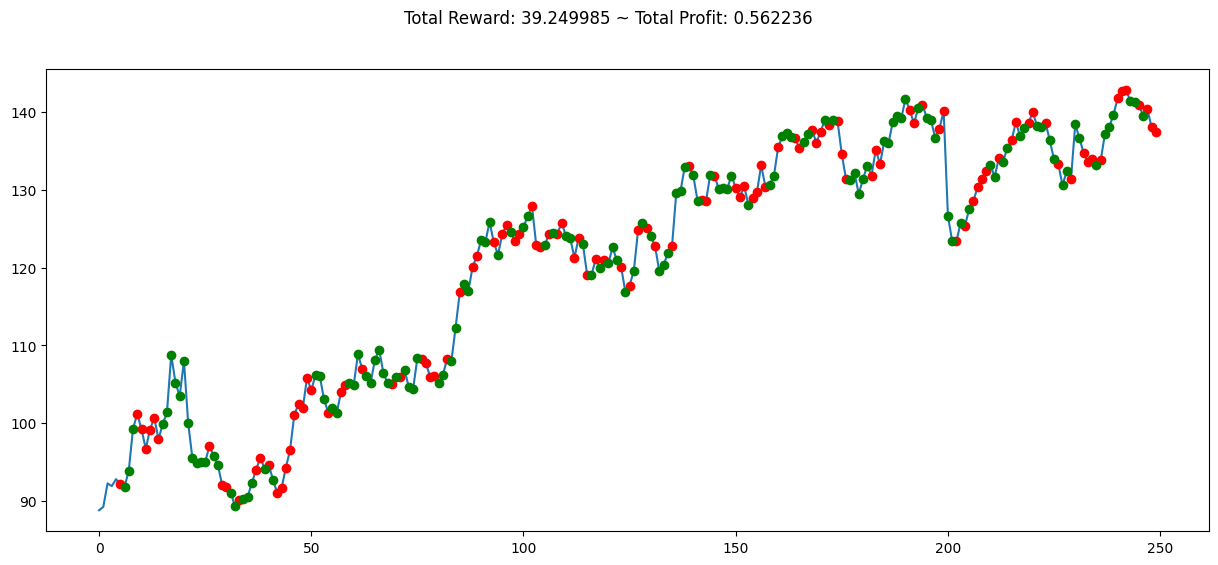

In [ ]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

From here I have tried to add in custom indicators and then train to test the outcome.


In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [ ]:
pip install finta

In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

AttributeError: 'int' object has no attribute 'replace'

In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df['RSI'] = TA.RSI(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700,NaN
2023-01-10,86.720001,89.474998,86.699997,89.239998,89.239998,22855600,100.000000
2023-01-11,90.059998,92.449997,89.739998,92.260002,92.260002,25998800,100.000000
2023-01-12,92.400002,92.620003,90.570000,91.910004,91.910004,22754200,90.095342
2023-01-13,91.528000,92.980003,90.930000,92.800003,92.800003,18630700,92.208643


In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700,0.000000
2023-01-10,86.720001,89.474998,86.699997,89.239998,89.239998,22855600,100.000000
2023-01-11,90.059998,92.449997,89.739998,92.260002,92.260002,25998800,100.000000
2023-01-12,92.400002,92.620003,90.570000,91.910004,91.910004,22754200,90.095342
2023-01-13,91.528000,92.980003,90.930000,92.800003,92.800003,18630700,92.208643


In [ ]:
def custom_signals(env):
  start = env.frame_bound[0] - env.window_size
  end = env.frame_bound[1]
  prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
  signal_features = env.df.loc[:, ['Low', 'Volume', 'RSI']].to_numpy()[start:end]
  return prices, signal_features

In [ ]:
class Custom_Env(StocksEnv):
  _process_data = custom_signals

env_new = Custom_Env(df = df, window_size = 10, frame_bound = (10,100))

In [ ]:
env_new.signal_features

array([[8.85800020e+01, 2.29967000e+07, 0.00000000e+00],
       [8.66999970e+01, 2.28556000e+07, 1.00000000e+02],
       [8.97399980e+01, 2.59988000e+07, 1.00000000e+02],
       [9.05700000e+01, 2.27542000e+07, 9.00953424e+01],
       [9.09300000e+01, 1.86307000e+07, 9.22086428e+01],
       [9.08399960e+01, 2.29358000e+07, 7.91332377e+01],
       [9.14000020e+01, 1.96416000e+07, 7.25544999e+01],
       [9.13799970e+01, 2.87077000e+07, 8.17253375e+01],
       [9.59100040e+01, 5.37048000e+07, 9.04182009e+01],
       [9.87500000e+01, 3.17918000e+07, 9.19080283e+01],
       [9.86999970e+01, 2.73914000e+07, 7.83183335e+01],
       [9.52620010e+01, 3.10009000e+07, 6.54041432e+01],
       [9.68200000e+01, 2.45421000e+07, 7.05315843e+01],
       [9.89700010e+01, 2.90204000e+07, 7.32545094e+01],
       [9.75199970e+01, 2.43651000e+07, 6.22282054e+01],
       [9.77900010e+01, 2.23068000e+07, 6.60559039e+01],
       [9.84199980e+01, 2.63926000e+07, 6.88205784e+01],
       [1.06540001e+02, 4.66226

In [ ]:
env_maker = lambda: env_new
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpPolicy', env, verbose = 1)
model.learn(total_timesteps = 100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 482      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.626   |
|    explained_variance | 0.0395   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.66     |
|    value_loss         | 6.02     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 521      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.64    |
|    explained_variance | 0.518    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.853   |
|    value_loss      

In [ ]:
env = Custom_Env(df = df, window_size = 10, frame_bound=(100,200))
obs, info = env.reset(seed = 1)

obs

array([[1.22720001e+02, 3.02513000e+07, 7.73802218e+01],
       [1.23449997e+02, 2.97602000e+07, 7.99092555e+01],
       [1.23050003e+02, 2.44779000e+07, 7.14388594e+01],
       [1.20750000e+02, 2.30879000e+07, 6.65782772e+01],
       [1.22900002e+02, 3.38127000e+07, 7.01683289e+01],
       [1.23290001e+02, 2.51547000e+07, 7.14829963e+01],
       [1.22889999e+02, 2.72307000e+07, 6.90846728e+01],
       [1.23099998e+02, 4.15488000e+07, 6.52921732e+01],
       [1.23300003e+02, 2.50177000e+07, 6.68359813e+01],
       [1.24349998e+02, 1.93624000e+07, 6.81481327e+01]])

info {'total_reward': 8.02499800000001, 'total_profit': 0.8154660490542567, 'position': <Positions.Short: 0>}


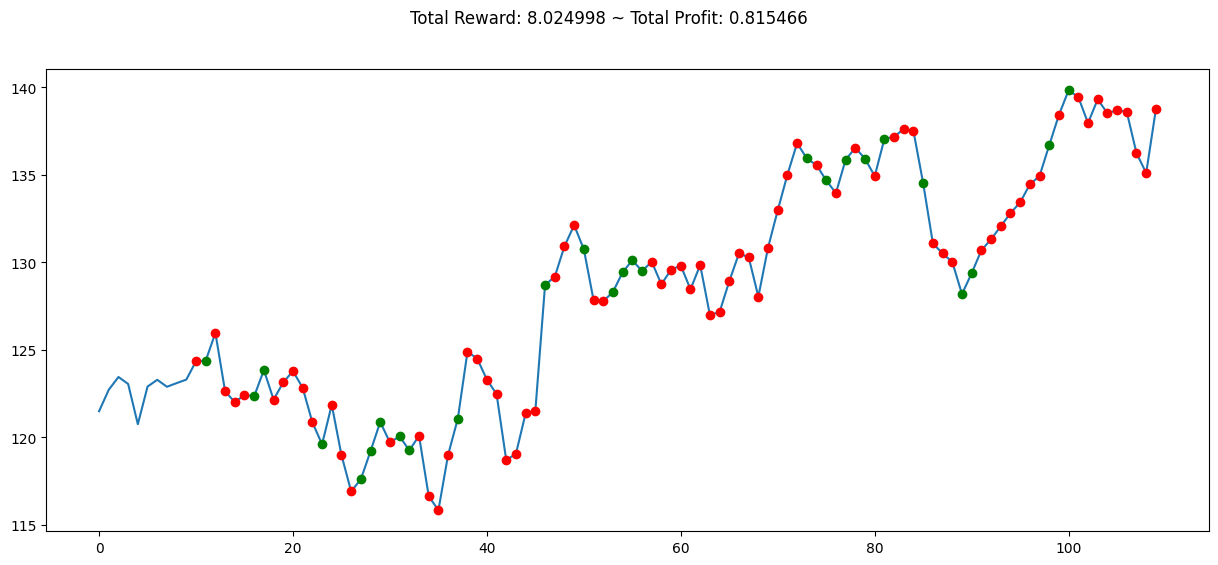

In [ ]:
while True:
  action, _states = model.predict(obs)
  obs,reward,tr,th,info = env.step(action)
  if tr or th:
    print("info", info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()